# Numerical methods for ODEs

## Learning objectives:

* Learn some common methods: Forward/Explicit Euler, Backward/Implicit Euler, Runge-Kutta, and Leap-Frog methods
    * Get an idea how these methods are derived from: interpolation, quadrature rules and direct finite differencing
* Learn five very important concepts:

    * **Well-posedness** of an initial-value problem (independent of numerical methods)
    * **Consistency** of a numerical method to the differential equation
    * **Stability** of a numerical method
    * **Convergence** of numerical solution computed by a numerical method to the analytical solutions of the ODEs
    * The order of a numerical method and *local truncation error* 
    
These concepts will be discussed using the model linear problem
$$ \frac{dy}{dt}=\lambda y,\,\,\, y(0)=y_0 $$
with $\lambda=a+b i$ being a complex number. 

An important factor is the sign of $a$, whetehr is is negative, zero or positive.


* Learn as a fact: ** For a wellposed problem, consistency + stability (of the numerical method) $\iff$ convergence **

* Know how to use Julia's DifferentialEquations package

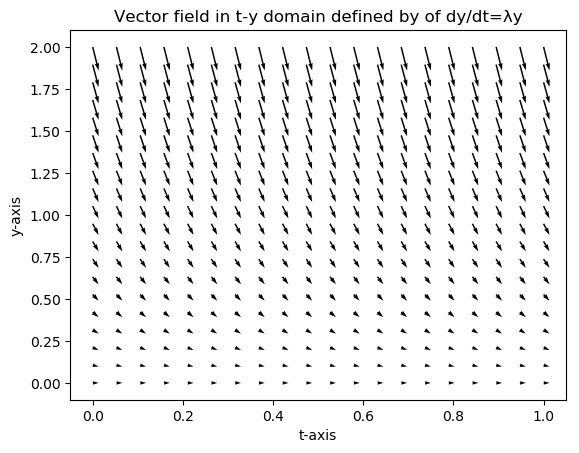

PyObject Text(0.5,1,u'Vector field in t-y domain defined by of dy/dt=\u03bby')

In [68]:
t=linspace(0,1,20)
y=linspace(0,2,20)

tgrid=repmat(t', length(y), 1)
ygrid=repmat(y, 1, length(t))

λ=-2.0

dy=λ.*ygrid
dt=ones(size(dy))
    
using PyPlot

quiver(tgrid,ygrid, dt,dy)
xlabel("t-axis")
ylabel("y-axis")
title("Vector field in t-y domain defined by of dy/dt=λy")

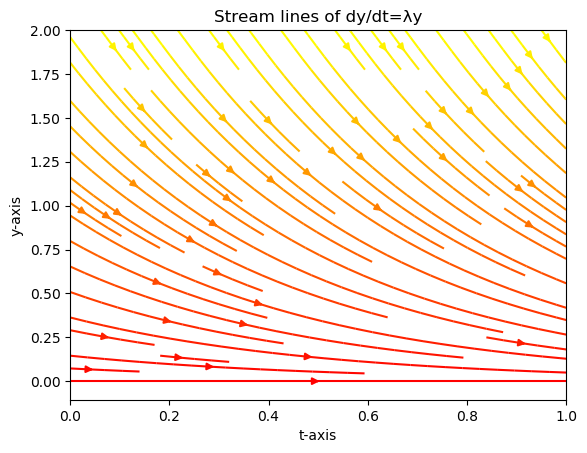

PyObject Text(0.5,1,u'Stream lines of dy/dt=\u03bby')

In [69]:
streamplot(tgrid, ygrid, dt,dy, color=ygrid, cmap=PyPlot.cm[:autumn])
xlabel("t-axis")
ylabel("y-axis")
title("Stream lines of dy/dt=λy")

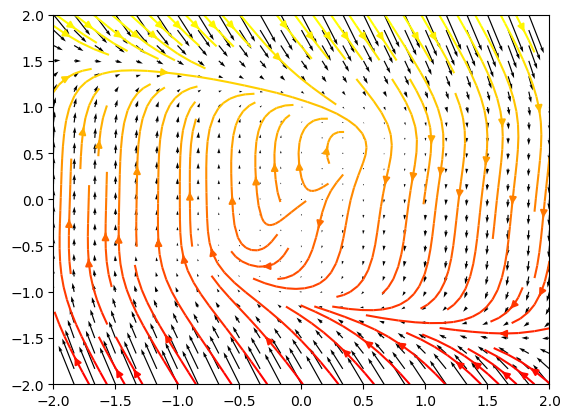

PyObject <matplotlib.streamplot.StreamplotSet object at 0x1387cc850>

In [73]:
N=25
x=linspace(-2,2,N)
y=linspace(-2,2,N)

xgrid=repmat(x', length(y), 1)
ygrid=repmat(y, 1, length(x))

quiver(xgrid,ygrid,-1.0-xgrid+8ygrid.^3,(-xgrid+ygrid-ygrid.^3)/0.05)
streamplot(xgrid,ygrid,-1.0-xgrid+8ygrid.^3,(-xgrid+ygrid-ygrid.^3)/0.05, color=ygrid, cmap=PyPlot.cm[:autumn])

### Solutions of the differential equation 

* They are curves that the streamlines (aka integral curves) shown above
* The slope of the streamlines are prescibed by the right hand side of the differential equation.
* By prescribing an initial condition, e,g, $y(0.0)=0.5$, one picks out a *unique* streamline=solution. 

## Euler's methods 

Differential equation: $\frac{dy}{dt}=f(t,y)$

$t_{n+1}=t_n+\Delta t$. We call $\Delta t$ the step size

The Forward-Euler method: $y(t_n)\approx y_n$, $y(t_{n+1})\approx y_{n+1}$

$$\frac{dy}{dt}(t_n) = f(t_n, y(t_n)) \approx \frac{y_{n+1}-y_n}{\Delta t}=f(t_n, y_n)$$

The Backward-Euler method: $y(t_n)\approx y_n$, $y(t_{n+1})\approx y_{n+1}$

$$\frac{dy}{dt}(t_{n+1}) = f(t_{n+1}, y(t_{n+1})) \approx \frac{y_{n+1}-y_n}{\Delta t}=f(t_{n+1}, y_{n+1})$$



In [8]:
#implements forward-euler method for dy/dt= f(t,y), with the prescibed step size Δt
function FE(tn, yn, f, Δt)
    yn+Δt*f(tn,yn)  # y(n+1)=yn+Δt*f(tn,yn)
end

function BE(tn, yn, f, Δt)
   #Need to solve the following equation: y(n+1) - Δtf(tn+Δt, y(n+1))=yn  
end

function BE_model(tn, yn, λ, Δt) #assume that f(t,y)=λy
   yn/(1.0-Δt*λ) 
end

BE_model (generic function with 1 method)

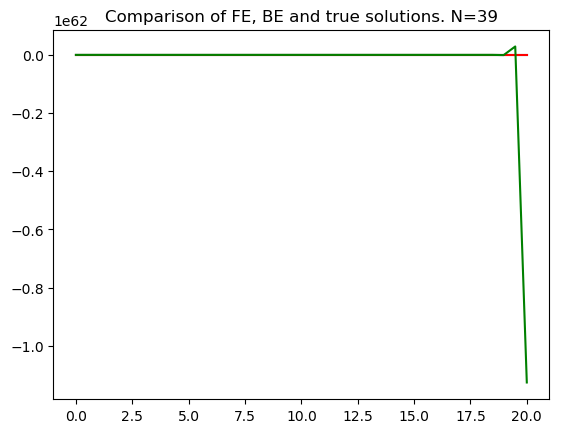

PyObject Text(0.5,1,u'Comparison of FE, BE and true solutions. N=39')

In [16]:
f(t,y)=λ*y

λ=-2.0

N=39
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(Complex, N+1)

#prescribe an initial condition
Y[1]= 1.0

Y_be=copy(Y)

for n=1:N
    Y[n+1]=FE(tspan[n], Y[n], f, Δt)
    Y_be[n+1]=BE_model(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y))
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=39")

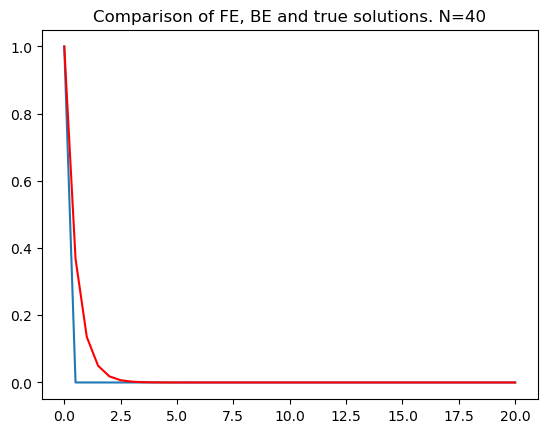

PyObject Text(0.5,1,u'Comparison of FE, BE and true solutions. N=40')

In [18]:
N=40
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(Complex, N+1)

#prescribe an initial condition
Y[1]= 1.0

Y_be=copy(Y)

for n=1:N
    Y[n+1]=FE(tspan[n], Y[n], f, Δt)
    Y_be[n+1]=BE_model(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y))
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=40")

#### Stability of FE and BE

* Observe that BE sotluon is ALWAYS "exponentially" decaying and stable.
* Observe the flip in stabiilty of FE from $N=39$ to $N=40$.

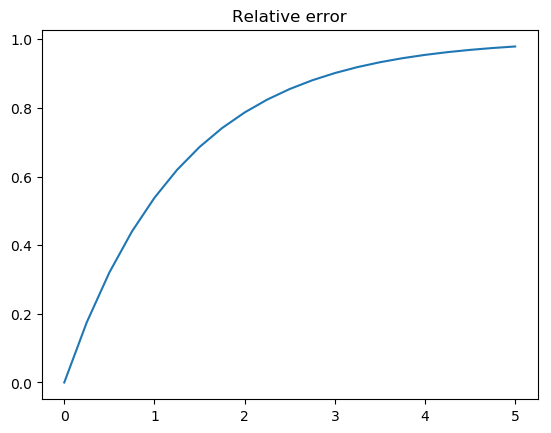

PyObject Text(0.5,1,u'Relative error')

In [3]:
plot(tspan, abs.( Y-trueY)./trueY)
title("Relative error")

In [ ]:
scatter(real.(Y), imag.(Y))

## Multistep methods

### The Leap-frog scheme

$$\frac{y_{n+1}-y_{n-1}}{\Delta t} = f(t_n y_n) $$

In [13]:
function LF(y_prev, yn, tn, f, Δt)
    #the value of y(n+1) =
    y_prev+Δt*f(tn, yn) #y_prev = y(n-1)
end

LF (generic function with 1 method)

In [ ]:
f(t,y)=λ*y

λ=-2.0

N=6*10
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(Complex, N+1)

#prescribe an initial condition
Y[1]= 1.0
Y[2]= #Use an Euler's method to approximate Y[2]

for n=2:N
    Y[n+1]=LF(Y[n-1], Y[n], tspan[n], f, Δt)
end

trueY=real.(Y[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y))
plot(tspan, real.(trueY),"r")


## Runge-Kutta methods

### Mid-point rule


* Is a type of second order accurate Runge-Lutta methods
* Comes from the Trapezoidal rule.
  
  $$\frac{y_{n+1}-y_n}{\Delta t} = \frac{1}{2}\left( f(t_n,y_n) + f(t_n, y_{n+1}^* \right)$$
  $$y_{n+1}^*:=y_n + \Delta t f(t_n,y_n)$$
  

In [ ]:
function RK2(tn,yn, f, Δt)
   #To be filled in in class 
   k0= f(tn, yn)
   y1=yn+Δt*f*k0
   
   k1= f(tn+Δt, y1) 

   #y(n+1)=
   yn+0.5*(k0+k1)*Δt
end

## Consistency

A scheme (numerical method) is consistent to the differential equation if the scheme converges to the differential equation as the step size, $h$, goes to zero.

* General procedure: plug in the analytical solution $y(t)$ into the nuemrical method, 
    * use Taylor's exapnsion
    * use the fact that $y'=f(t,y)$ 
   and determine the term that describes the discrepancy; that is, how $y(t)$ does not satisfy the nuemrical scheme.
   
    * This discrepancy is called the **local truncation error** (LTE).



* If LTE=$\mathcal{O}(\Delta t^p+1), p>0$, we say that
   * The numerical method is **consistent**
   * The numerical method is $p$-th order accurate.

## Stability



## Some nonlinear examples

#### A relaxation oscillator

$$\frac{dx}{dt}=-1-x-8y^3$$
$$\frac{dy}{dt}=(-x+y-y^3)/\nu$$

Let's try to solve this with a good solver from a Julia package.
Let's also try to solve this with our Euler's schemes.

* For the implicit Euler scheme, how should one solve the nonlinear equations?

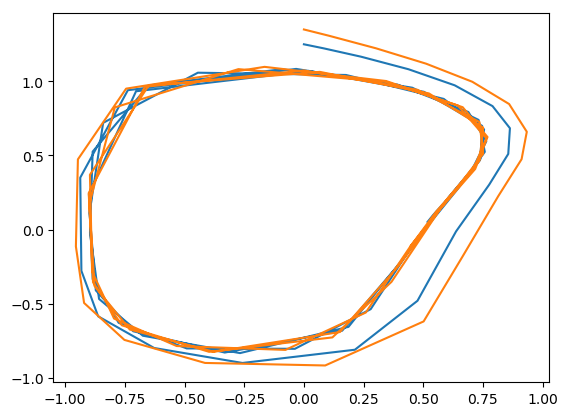

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13d4edb90>

In [20]:
using DifferentialEquations

function RelaxOsc(t, u, du)
    
    ν=0.15
    x,y=u[1], u[2]    

    du[1]=-1.0-x+8y.^3
    du[2]=(-x+y-y.^3)/ν
end

u0=[0.0; 1.25]
tspan=(0.0, 5.0)

prob1=ODEProblem(RelaxOsc, u0, tspan)
sol1=solve(prob1)

v0=[0.0; 1.25+0.1]

prob2=ODEProblem(RelaxOsc, v0, tspan)
sol2=solve(prob2)

using PyPlot
plot( sol1[1,:], sol1[2,:])
plot( sol2[1,:], sol2[2,:])


#using Plots

#plot( sol1, vars=(1,2))
#plot( sol2, vars=(1,2))

In [24]:
size(sol1)

(2, 66)

In [6]:
function RelaxOsc(t, u)
    
    ν=0.15
    x,y=u[1], u[2]    

    [-1.0-x+8y.^3;(-x+y-y.^3)/ν]
end

RelaxOsc (generic function with 2 methods)

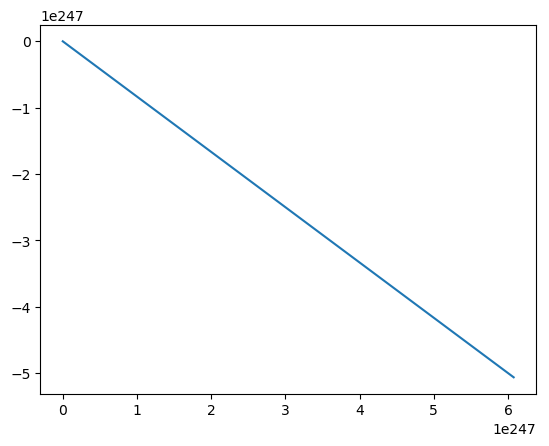

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13de83610>

In [27]:
N=66
tspan=linspace(0,5,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(2,N+1)

#prescribe an initial condition
Y[:,1]= u0

for n=1:N
    Y[:,n+1]=FE(tspan[n], Y[:,n], RelaxOsc, Δt)
end

plot( Y[1,:], Y[2,:])

#### Volterra-Lotka equations

This is a prototype of a "predator-Prey" model used in biological problems alot.

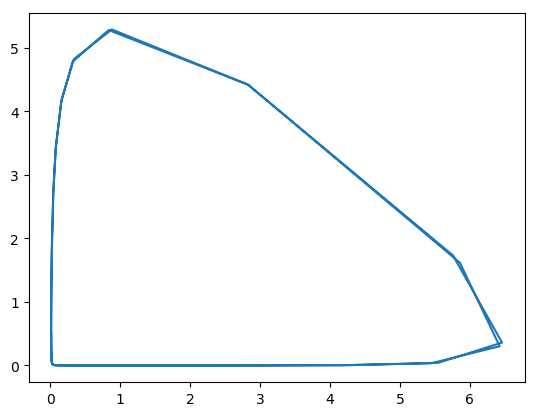

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13cc91a50>

In [5]:
using DifferentialEquations


function VolterraLotka(t, u, du)
    
    ν=0.5
    x,y=u[1], u[2]    

    du[1]=x*(1.0-y/ν)
    du[2]=y*(x-1.0)/ν
end

u0=[0.01; 0.5]
tspan=(0.0, 20.0)

prob=ODEProblem(VolterraLotka, u0, tspan)
sol=solve(prob)

plot( sol[1,:], sol[2,:])
#plot( sol1[1,:], sol1[2,:])